## Activity: AI based dynamics classification tool, exploiting processing of stabilogram Features.
----
<font size = 4 > This repository is containing data analysis of sensor node attached to a dedicated mechanism shown in figure below for collecting postural sway data for the classification of the postural sway behaviour. </font>

----
### Explanation of the setup
Experimental surveys aimed to acquire the dataset have been performed by using the dedicated structure, shown in Fig. 1. This set-up allows for reproducing different dynamics, thus resembling the following movements: 

* **Stable behaviors (ST)**,
* **Antero-Posterior (AP)**, 
* **Medio-Lateral (ML) dynamics**,  
* **Unstable behaviors (UNST)**. 

The sensor node is located on the structure in a position corresponding to the user chest, where H1 is the distance between the sensor node and the bottom joint (on the floor), while H2 is the distance between the node and the belt joint. ML displacements are obtained by manually tilting the system around the belt joint, while APs are generated by exploiting tilting around the bottom joint. 

<font size=4> The sensor setup is depicted in the picture below.</font>

<center> <img src=./img/data-collection-setup.png width=300 height=600> </center>

### Data
<font size = 4 > Data contains extracted features from the accelerometer data sampled at 100Hz . Two features are extracted from the data namely Antero-Posterior Displacement (DAP) and Medio-Lateral displacement (DML).
Starting from three acceleration components, time evolutions of the Antero-Posterior and Medio-Lateral displacement (DAP and DML) have been estimated by the following relationships  
</font> 

$$ DAP = H_1{ A_z\over \sqrt{{A_y}^2+{A_x}^2}} $$
$$ DML = H_2{ A_x\over \sqrt{{A_y}^2+{A_z}^2}} $$
H<sub>1</sub> and H<sub>2</sub> are the distance between the sensor node and the bottom joint (on the floor) and the belt joint respectively.


The dataset is organized as follows:
* In each folder Case_x you can find the time evolution of [DAP DML] for several examples of Standing, AP, ML, Unstable dynamics, obtained by the above-described set-up. 
* Each case represents a different positioning of the sensor node (different heights H1 and H2).


 <font size=4>  <b>Quick Note</b> </font>
 
Plotting DAP against DML you can find the stabilogram for each dynamic, and then you can save as images to be used for training and testing AI classification tool.
If you prefer stabilograms centered around zero DAP-DML values, you have just to remove the mean value from time-series.

## Initial analysis of the data: Read, find minimum length etc.

In [23]:
import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# root_dir = 'C:/Users/101/repos/postural_sway_analysis/data/'

classes = ['Stab_standing','Stab_AP','Stab_ML','Stab_Instabile']
input_data = np.array([])
output_data = np.array([])
min_len = 1000000
min_file_name = ''
for filename in glob.iglob('./data/Case_*/**/*.txt', recursive=True):
    temp_data = np.loadtxt(filename)
    len_data = len(temp_data)
    if(len_data < min_len):
        min_len = len_data
        min_file_name = filename
    if classes[0] in filename:
        stab_standing = temp_data
    if classes[1] in filename:
        stab_ap = temp_data
    if classes[2] in filename:
        stab_ml = temp_data
    if classes[3] in filename:
        stab_instabile = temp_data


print(min_len)
print(min_file_name)

455
./data/Case_5/Stabilogram/Stab_AP11.txt


## Read data and structure it in a numpy array
    Here in initial read we consider the minumum length of the data for each case to have equal length for all the cases.
    Second we consider both DAP and DML as different inputs for the AI model.
    In other trial we will consider DAP and DML as a single input for the AI model.


In [65]:
import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# root_dir = 'C:/Users/101/repos/postural_sway_analysis/data/'

classes = ['Stab_standing','Stab_AP','Stab_ML','Stab_Instabile']

min_len = 450
input_data = np.zeros((2,min_len))
output_data = []
filenames = []
min_file_name = ''
for filename in glob.iglob('./data/Case_*/**/*.txt', recursive=True):
    # print(filename)
    filenames.append(filename)
    temp_data = np.loadtxt(filename)
    temp_data = temp_data[:min_len]
    if classes[0] in filename:
        stab_standing = temp_data
        output_data = np.append(output_data, [0,0])
    if classes[1] in filename:
        stab_ap = temp_data
        output_data = np.append(output_data, [1,1])
    if classes[2] in filename:
        stab_ml = temp_data
        output_data = np.append(output_data, [2,2])
    if classes[3] in filename:
        stab_instabile = temp_data
        output_data = np.append(output_data, [3,3])
    # pd.concat([df, df_temp], axis=1)
    temp_data = np.transpose(temp_data)
    input_data = np.append(input_data, temp_data,axis=0)
input_data = np.delete(input_data, [0,1], axis=0)
print(f"Input data shape: {input_data.shape}")
print(f"Output data shape: {output_data.shape}")

Input data shape: (2000, 450)
Output data shape: (2000,)


## Plot Stabilograms - Scatter Plot

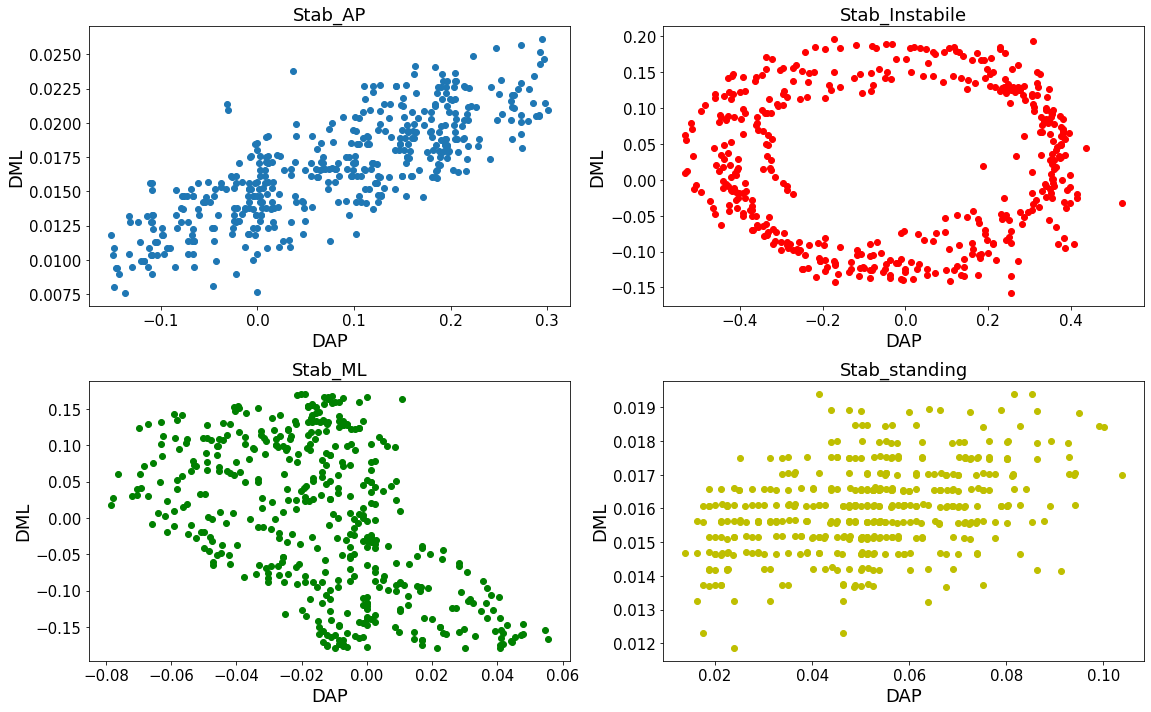

In [6]:
# Plot 2x2 subplots
# %matplotlib

fig, axs = plt.subplots(2, 2, figsize=(16,10))
axs[0, 0].scatter(stab_ap[:,0], stab_ap[:,1])
axs[0, 0].set_title('Stab_AP', fontsize=18)
axs[0,0].set_xlabel('DAP', fontsize=18)
axs[0,0].set_ylabel('DML', fontsize=18)
axs[0,0].tick_params(axis='both', labelsize=15)

axs[0, 1].scatter(stab_instabile[:,0], stab_instabile[:,1], c='r')
axs[0, 1].set_title('Stab_Instabile',fontsize=18)
axs[0, 1].set_xlabel('DAP', fontsize=18)
axs[0, 1].set_ylabel('DML', fontsize=18)
axs[0, 1].tick_params(axis='both', labelsize=15)

axs[1, 0].scatter(stab_ml[:,0], stab_ml[:,1], c='g')
axs[1, 0].set_title('Stab_ML', fontsize=18)
axs[1, 0].set_xlabel('DAP', fontsize=18)
axs[1, 0].set_ylabel('DML', fontsize=18)
axs[1, 0].tick_params(axis='both', labelsize=15)

axs[1, 1].scatter(stab_standing[:,0], stab_standing[:,1], c='y')
axs[1, 1].set_title('Stab_standing',fontsize=18)
axs[1, 1].set_xlabel('DAP', fontsize=18)
axs[1, 1].set_ylabel('DML', fontsize=18)
axs[1, 1].tick_params(axis='both', labelsize=15)
plt.tight_layout()

## Plot Stabilograms - Line Plot

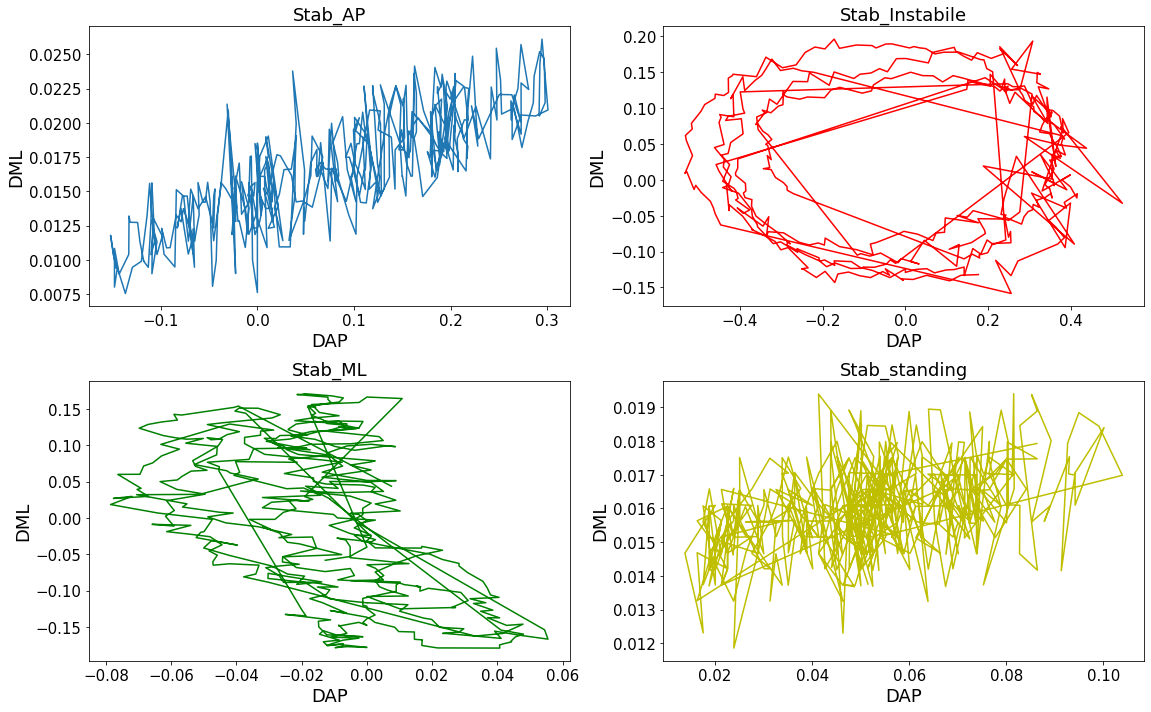

In [7]:
# Plot 2x2 subplots
# %matplotlib

fig, axs = plt.subplots(2, 2, figsize=(16,10))
axs[0, 0].plot(stab_ap[:,0], stab_ap[:,1])
axs[0, 0].set_title('Stab_AP', fontsize=18)
axs[0,0].set_xlabel('DAP', fontsize=18)
axs[0,0].set_ylabel('DML', fontsize=18)
axs[0,0].tick_params(axis='both', labelsize=15)

axs[0, 1].plot(stab_instabile[:,0], stab_instabile[:,1], c='r')
axs[0, 1].set_title('Stab_Instabile',fontsize=18)
axs[0, 1].set_xlabel('DAP', fontsize=18)
axs[0, 1].set_ylabel('DML', fontsize=18)
axs[0, 1].tick_params(axis='both', labelsize=15)

axs[1, 0].plot(stab_ml[:,0], stab_ml[:,1], c='g')
axs[1, 0].set_title('Stab_ML', fontsize=18)
axs[1, 0].set_xlabel('DAP', fontsize=18)
axs[1, 0].set_ylabel('DML', fontsize=18)
axs[1, 0].tick_params(axis='both', labelsize=15)

axs[1, 1].plot(stab_standing[:,0], stab_standing[:,1], c='y')
axs[1, 1].set_title('Stab_standing',fontsize=18)
axs[1, 1].set_xlabel('DAP', fontsize=18)
axs[1, 1].set_ylabel('DML', fontsize=18)
axs[1, 1].tick_params(axis='both', labelsize=15)
plt.tight_layout()

## Seperataly Plot DAP-DML for each dynamic

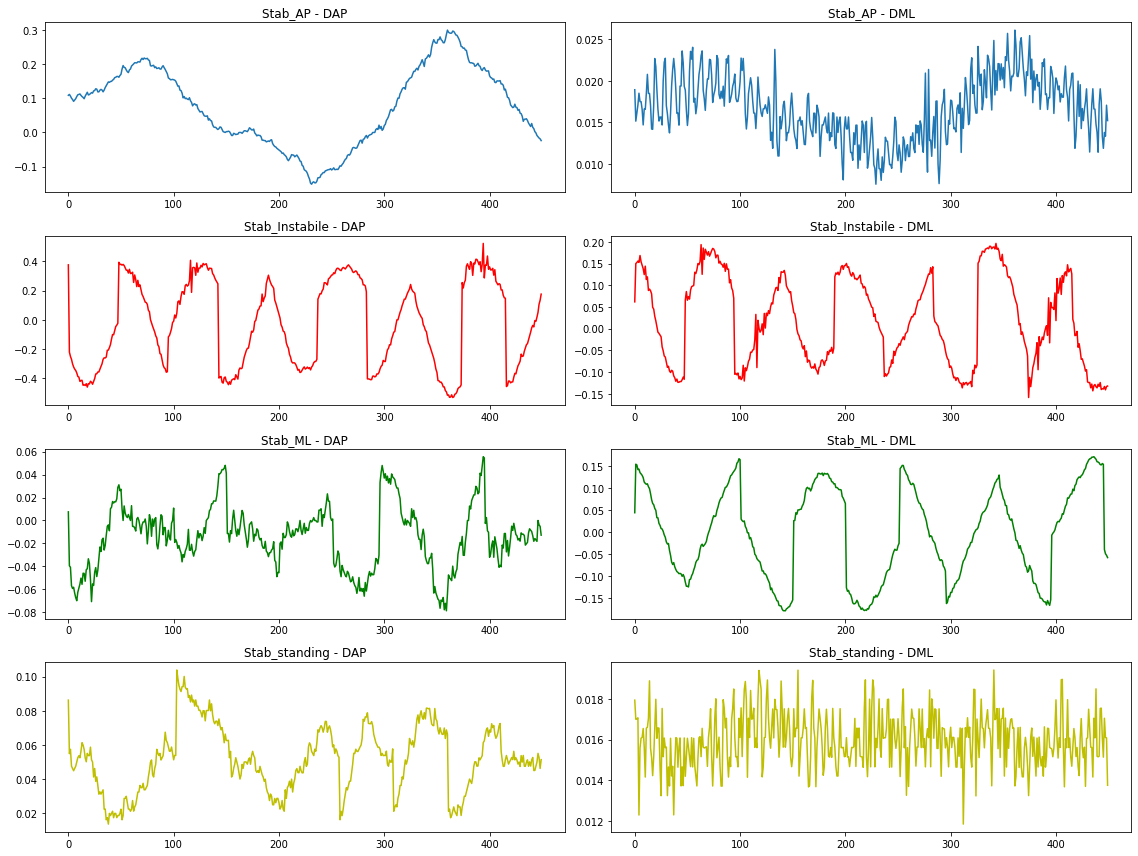

In [8]:
# Plot 2x2 subplots
# %matplotlib
# %matplotlib
fig, axs = plt.subplots(4, 2, figsize=(16,12))
axs[0, 0].plot(stab_ap[:,0])
axs[0, 0].set_title('Stab_AP - DAP')

axs[0,1].plot(stab_ap[:,1])
axs[0,1].set_title('Stab_AP - DML')

axs[1, 0].plot(stab_instabile[:,0], c='r')
axs[1, 0].set_title('Stab_Instabile - DAP')

axs[1,1].plot(stab_instabile[:,1], c='r')
axs[1,1].set_title('Stab_Instabile - DML')

axs[2, 0].plot(stab_ml[:,0], c='g')
axs[2, 0].set_title('Stab_ML - DAP')

axs[2,1].plot(stab_ml[:,1], c='g')
axs[2,1].set_title('Stab_ML - DML')

axs[3, 0].plot(stab_standing[:,0], c='y')
axs[3, 0].set_title('Stab_standing - DAP')

axs[3,1].plot(stab_standing[:,1], c='y')
axs[3,1].set_title('Stab_standing - DML')
plt.tight_layout()

## Concatenate data and plot 

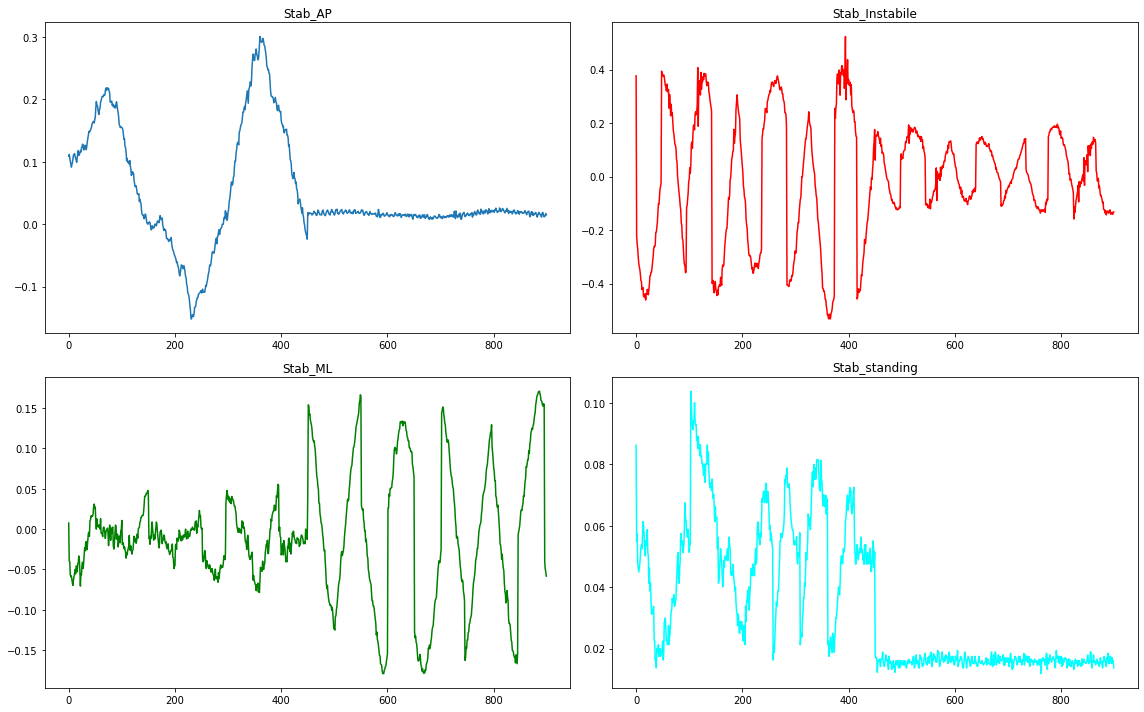

In [9]:
test_stab = np.concatenate((stab_ap[:,0],stab_ap[:,1]), axis=0)
test_ml = np.concatenate((stab_ml[:,0],stab_ml[:,1]), axis=0)
test_instabile = np.concatenate((stab_instabile[:,0],stab_instabile[:,1]), axis=0)
test_standing = np.concatenate((stab_standing[:,0],stab_standing[:,1]), axis=0)
# %matplotlib
fig, axs = plt.subplots(2, 2, figsize=(16,10))
axs[0, 0].plot(test_stab)
axs[0, 0].set_title('Stab_AP')
axs[0, 1].plot(test_instabile, c='r')
axs[0, 1].set_title('Stab_Instabile')
axs[1, 0].plot(test_ml, c='g')
axs[1, 0].set_title('Stab_ML')
axs[1, 1].plot(test_standing, c='cyan')
axs[1, 1].set_title('Stab_standing')
plt.tight_layout()

## Scatter Plot all dynamics in one plot

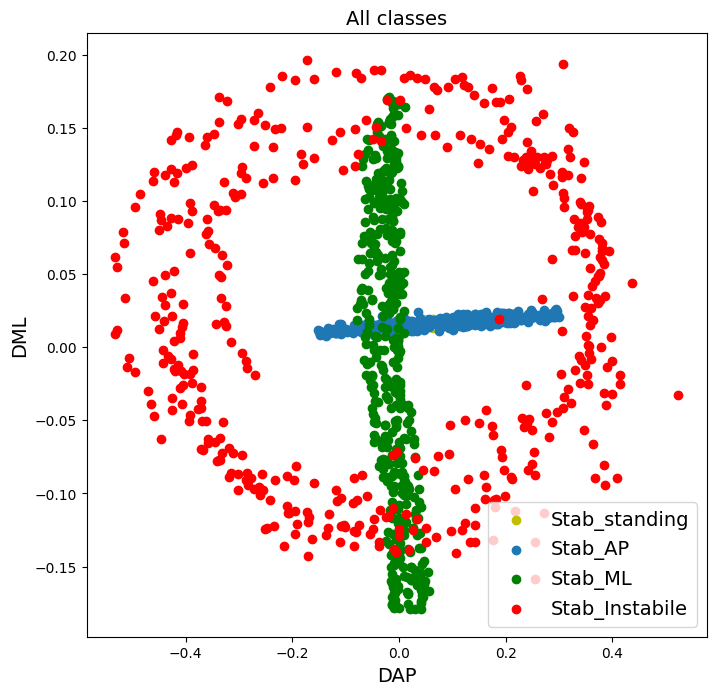

In [10]:
# Plot 2x2 subplots
# %matplotlib
fig = plt.figure(figsize=(8,8), dpi=100)
plt.scatter(stab_standing[:,0], stab_standing[:,1], c='y')
plt.scatter(stab_ap[:,0], stab_ap[:,1])
plt.scatter(stab_ml[:,0], stab_ml[:,1], c='g')
plt.scatter(stab_instabile[:,0], stab_instabile[:,1], c='r')
plt.legend(classes, fontsize=14)
plt.title('All classes', fontsize=14)
plt.xlabel('DAP', fontsize=14)
plt.ylabel('DML', fontsize=14)
plt.show()

## Import libraries for training and select GPU

In [12]:
from sklearn.model_selection import train_test_split
import random
import tensorflow as tf
import numpy as np
import pathlib

# Using GPU
import os
import scipy.io as scpy
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '0'  # Set to -1 if CPU should be used CPU = -1 , GPU = 0

gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
elif cpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        logical_cpus= tf.config.experimental.list_logical_devices('CPU')
        print(len(cpus), "Physical CPU,", len(logical_cpus), "Logical CPU")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)


1 Physical GPUs, 1 Logical GPUs


## Structure data for training, test and validation
    Here the dataset is structured in way that both DAP and DML are considered as different inputs.
    This is the first method.

In [25]:
x_data = input_data
y_data = output_data
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
# split into train test sets
x_train, x_val_to_use, y_train, y_val_to_use = train_test_split(x_data, y_data, test_size=0.3,random_state=SEED)
x_val, x_test, y_val, y_test = train_test_split(x_val_to_use, y_val_to_use, test_size=0.5,random_state=SEED)

print(f" {len(x_train), len(x_val), len(x_test)}")
print(f" {len(y_train), len(y_val), len(y_test)}")

 (1400, 300, 300)
 (1400, 300, 300)


## Try a simple dense model

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 12)                5412      
                                                                 
 dense_16 (Dense)            (None, 4)                 52        
                                                                 
 dense_17 (Dense)            (None, 4)                 20        
                                                                 
Total params: 5,484
Trainable params: 5,484
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
44/44 [==============================] - 1s 3ms/step - loss: 1.2700 - accuracy: 0.4300 - val_loss: 1.2038 - val_accuracy: 0.4567
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 1.1193 - accuracy: 0.5336 - val_loss: 1.1116 - val_accuracy: 0.4967
Epoch 3/100
44/44 [===============

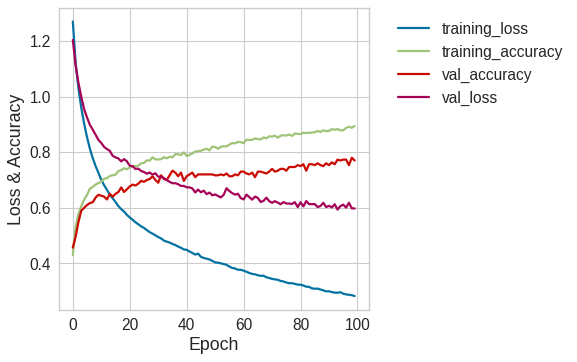

In [26]:
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
BATCH_SIZE = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (train_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = (val_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu',input_shape=(450,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4,activation='softmax')
])


dense_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
dense_model.summary()              

history=dense_model.fit(train_dataset,validation_data=val_dataset, epochs=100,verbose=1)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5),dpi=80)
ax = fig.add_subplot(111)
ax.plot(history.history['loss'], linewidth=2)
ax.plot(history.history['accuracy'],linewidth=2)
ax.plot(history.history['val_accuracy'],linewidth=2)
ax.plot(history.history['val_loss'],linewidth=2)
ax.grid(True)
ax.set_ylabel('Loss & Accuracy', fontsize=16)
ax.set_xlabel('Epoch',fontsize=16)
ax.legend(['training_loss', 'training_accuracy', 'val_accuracy', 'val_loss'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# accuracy!
print("Training results")
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Training Loss: {history.history['loss'][-1]}")

# evaluating dense_model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")

plt.show()

### EVALUATE THE MODEL

In [16]:
dense_model.evaluate(x_test, y_test, verbose=1)

10/10 [==============================] - 0s 958us/step - loss: 0.5953 - accuracy: 0.7333


[0.5952680706977844, 0.7333333492279053]

## Try the CNN Model with 1D Convolution

Model: "conv_model_paper"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 444, 32)           256       
                                                                 
 batch_normalization (BatchN  (None, 444, 32)          128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 444, 32)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 55, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 51, 48)            7728      
                                                                 
 batch_normalization_1 (Batc  (None, 51, 48)      

2023-01-27 16:05:02.508190: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8500


44/44 [==============================] - 2s 6ms/step - loss: 2.3624 - accuracy: 0.2750 - val_loss: 1.3634 - val_accuracy: 0.2933
Epoch 2/100
44/44 [==============================] - 0s 3ms/step - loss: 1.8110 - accuracy: 0.3493 - val_loss: 1.3868 - val_accuracy: 0.3167
Epoch 3/100
44/44 [==============================] - 0s 3ms/step - loss: 1.4692 - accuracy: 0.4979 - val_loss: 1.4172 - val_accuracy: 0.2733
Epoch 4/100
44/44 [==============================] - 0s 3ms/step - loss: 1.2218 - accuracy: 0.5764 - val_loss: 1.4673 - val_accuracy: 0.2867
Epoch 5/100
44/44 [==============================] - 0s 3ms/step - loss: 1.1741 - accuracy: 0.5800 - val_loss: 1.5017 - val_accuracy: 0.3033
Epoch 6/100
44/44 [==============================] - 0s 3ms/step - loss: 1.0840 - accuracy: 0.5950 - val_loss: 1.5017 - val_accuracy: 0.3167
Epoch 7/100
44/44 [==============================] - 0s 3ms/step - loss: 1.0532 - accuracy: 0.5979 - val_loss: 1.4765 - val_accuracy: 0.3300
Epoch 8/100
44/44 [======

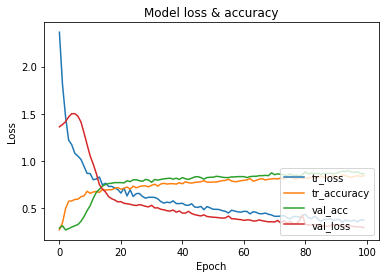

In [17]:
model = tf.keras.Sequential(name='conv_model_paper')
model.add(tf.keras.layers.InputLayer(input_shape=(450,1)))
model.add(tf.keras.layers.Conv1D(32,7))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=8))
model.add(tf.keras.layers.Conv1D(48,5))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=4))
model.add(tf.keras.layers.MaxPooling1D(pool_size=4))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

print(model.summary())
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x_train,y_train, epochs=100, validation_data=(x_val,y_val), verbose=1)   


# Plotting accuracy and loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])


plt.title('Model loss & accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['tr_loss', 'tr_accuracy', 'val_acc', 'val_loss'], loc='lower right')
# accuracy!
print("Training results")
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Training Loss: {history.history['loss'][-1]}")

# evaluating model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")


plt.show()

## PYCARET - AUTO ML CLASSIFICATION TEST

In [17]:
from pycaret.classification import *
s = setup(x_data, target = y_data)

In [18]:
best = compare_models()

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [49]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Let's Concatenate DAP and DML and try again

In [66]:
import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# root_dir = 'C:/Users/101/repos/postural_sway_analysis/data/'

classes = ['Stab_standing','Stab_AP','Stab_ML','Stab_Instabile']

min_len = 450
input_data = np.zeros((1,min_len*2))
output_data = []
min_file_name = ''
for filename in glob.iglob('./data/Case_*/**/*.txt', recursive=True):
    # print(filename)
    temp_data = np.loadtxt(filename)
    temp_data = temp_data[:min_len]
    concat_data = np.concatenate((temp_data[:,0],temp_data[:,1]), axis=0)
    if classes[0] in filename:
        stab_standing = temp_data
        output_data = np.append(output_data, 0)
    if classes[1] in filename:
        stab_ap = temp_data
        output_data = np.append(output_data, 1)
    if classes[2] in filename:
        stab_ml = temp_data
        output_data = np.append(output_data, 2)
    if classes[3] in filename:
        stab_instabile = temp_data
        output_data = np.append(output_data, 3)
    concat_data = np.reshape(concat_data, (1,concat_data.shape[0]))    
    input_data = np.append(input_data, concat_data,axis=0)
    input_data = np.float32(input_data)
input_data = np.delete(input_data, 0, axis=0)
print(f"Input data shape  : {input_data.shape}")
print(f"Output data shape : {output_data.shape}")

Input data shape  : (1000, 900)
Output data shape : (1000,)


## Train - Validation - Test Split

In [45]:
x_data = input_data
y_data = output_data
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
# split into train test sets
x_train, x_val_to_use, y_train, y_val_to_use = train_test_split(x_data, y_data, test_size=0.3,random_state=SEED)
x_val, x_test, y_val, y_test = train_test_split(x_val_to_use, y_val_to_use, test_size=0.5,random_state=SEED)

print(f" {len(x_train), len(x_val), len(x_test)}")
print(f" {len(y_train), len(y_val), len(y_test)}")

 (700, 150, 150)
 (700, 150, 150)


## PYCARET - AUTO ML CLASSIFICATION TEST

In [20]:
from pycaret.classification import *
s = setup(x_data, target = y_data)

In [22]:
best = compare_models()

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [72]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Try a simple dense model

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 12)                10812     
                                                                 
 dense_57 (Dense)            (None, 4)                 52        
                                                                 
 dense_58 (Dense)            (None, 4)                 20        
                                                                 
Total params: 10,884
Trainable params: 10,884
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
22/22 [==============================] - 1s 4ms/step - loss: 1.2502 - accuracy: 0.4571 - val_loss: 1.1625 - val_accuracy: 0.4867
Epoch 2/100
22/22 [==============================] - 0s 1ms/step - loss: 1.0532 - accuracy: 0.5714 - val_loss: 1.0453 - val_accuracy: 0.5133
Epoch 3/100
22/22 [============

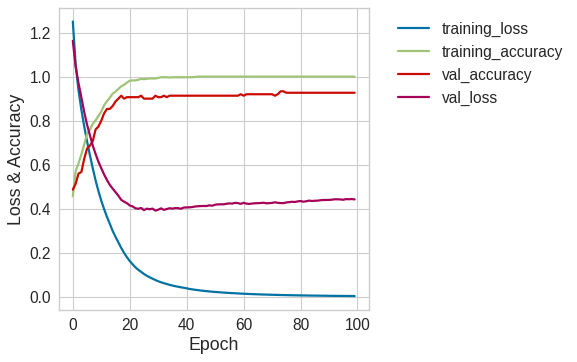

In [47]:
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
BATCH_SIZE = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (train_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = (val_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu',input_shape=(900,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4,activation='softmax')
])


dense_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
dense_model.summary()              

history=dense_model.fit(train_dataset,validation_data=val_dataset, epochs=100,verbose=1)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5),dpi=80)
ax = fig.add_subplot(111)
ax.plot(history.history['loss'], linewidth=2)
ax.plot(history.history['accuracy'],linewidth=2)
ax.plot(history.history['val_accuracy'],linewidth=2)
ax.plot(history.history['val_loss'],linewidth=2)
ax.grid(True)
ax.set_ylabel('Loss & Accuracy', fontsize=16)
ax.set_xlabel('Epoch',fontsize=16)
ax.legend(['training_loss', 'training_accuracy', 'val_accuracy', 'val_loss'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# accuracy!
print("Training results")
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Training Loss: {history.history['loss'][-1]}")

# evaluating dense_model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")

plt.show()

In [48]:
dense_model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 1ms/step - loss: 0.4056 - accuracy: 0.9200


[0.40559709072113037, 0.9200000166893005]

### Convert it to TF Lite model

In [21]:
float_converter = tf.lite.TFLiteConverter.from_keras_model(dense_model)
float_tflite_model = float_converter.convert()
tflite_model_file = pathlib.Path('dense_model.tflite')
tflite_model_file.write_bytes(float_tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpd00kbtjo/assets


INFO:tensorflow:Assets written to: /tmp/tmpd00kbtjo/assets
2023-01-16 11:01:29.989687: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2023-01-16 11:01:30.008097: I tensorflow/cc/saved_model/loader.cc:213] Running initialization op on SavedModel bundle at path: /tmp/tmpd00kbtjo
2023-01-16 11:01:30.012297: I tensorflow/cc/saved_model/loader.cc:305] SavedModel load for tags { serve }; Status: success: OK. Took 24815 microseconds.


45660

### Convert it to C++ model

In [22]:
!xxd -i dense_model.tflite > dense_model.cc

### Quantize the model and save as TFLite

In [23]:
def representative_data_gen():
  for input_value in tf.data.Dataset.from_tensor_slices(x_train).batch(1).take(100):
    # Model has only one input so each data point has one element.
    yield [input_value]
converter = tf.lite.TFLiteConverter.from_keras_model(dense_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
tflite_model_quant = converter.convert()

tflite_model_file = pathlib.Path('dense_model_quantized.tflite')
tflite_model_file.write_bytes(tflite_model_quant)

INFO:tensorflow:Assets written to: /tmp/tmppgf0rmgn/assets


INFO:tensorflow:Assets written to: /tmp/tmppgf0rmgn/assets
/home/veysiadn/anaconda3/lib/python3.9/site-packages/tensorflow/lite/python/convert.py:765: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "
2023-01-16 11:01:45.495572: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2023-01-16 11:01:45.514083: I tensorflow/cc/saved_model/loader.cc:213] Running initialization op on SavedModel bundle at path: /tmp/tmppgf0rmgn
2023-01-16 11:01:45.518464: I tensorflow/cc/saved_model/loader.cc:305] SavedModel load for tags { serve }; Status: success: OK. Took 25032 microseconds.
fully_quantize: 0, inference_type: 6, input_inference_type: FLOAT32, output_inference_type: FLOAT32


13800

### Convert it to C++ CODE

In [24]:
!xxd -i dense_model_quantized.tflite > dense_model_quantized.cc

### Run TF Lite Model

In [25]:
# Helper function to run inference on a TFLite model
def run_tflite_model(tflite_file, indices):
  # Initialize the interpreter
  interpreter = tf.lite.Interpreter(model_path=str(tflite_file))
  interpreter.allocate_tensors()

  input_details = interpreter.get_input_details()[0]
  output_details = interpreter.get_output_details()[0]

  predictions = 0
  for i, index in enumerate(indices):
    test_data = x_test[index]
    test_data=np.expand_dims(test_data, axis=0)
    test_labels = y_test[index]

    interpreter.set_tensor(input_details["index"],test_data)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details["index"])[0]
    print(output[0])
    print(output[1])
    print(output[2])
    predictions = output.argmax()

  return predictions

In [26]:
import matplotlib.pylab as plt
tflite_model_file = 'dense_model.tflite'
# Change this to test a different image
indice = 333

## Helper function to test the models on one image
def test_model(tflite_file, indice, model_type):

  predictions = run_tflite_model(tflite_file, [indice])

  print(f" Model \n True:{y_test[indice]}, Predicted:{predictions}")
  
test_model(tflite_model_file, indice, model_type="Float")

0.99966025
0.00020287636
0.00012663561
 Model 
 True:0.0, Predicted:0


### Evaluate the quantized model

In [30]:
import numpy as np

def run_tflite_model_for_eval(interpreter, indices):
  input_details = interpreter.get_input_details()[0]
  output_details = interpreter.get_output_details()[0]

  predictions = 0
  for i, index in enumerate(indices):
    test_data = x_test[index]
    test_data=np.expand_dims(test_data, axis=0)

    interpreter.set_tensor(input_details["index"], test_data)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details["index"])[0]
    predictions = output.argmax()
  return predictions
  
def evaluate_model(interpreter):
  output_predictions =[]
  for i in range(len(x_test)):
    output_predictions.append(run_tflite_model_for_eval(interpreter,[i]))
  output_predictions = np.array(output_predictions)
  accuracy = (output_predictions == y_test).mean()
  return accuracy

In [31]:
interpreter = tf.lite.Interpreter(model_path='dense_model_quantized.tflite')
interpreter.allocate_tensors()

test_accuracy = evaluate_model(interpreter)

print('Optimized dense_model TFLite test_accuracy:', test_accuracy)

Optimized dense_model TFLite test_accuracy: 1.0


## MLTK Library for profiling the tflite models.
    It is really useful for calculating number of operations, required memory, CPU cycle etc.

In [2]:
# Import the standard Python packages used by the examples
import os
import urllib
import shutil
import tempfile

# Import the necessary MLTK APIs
from mltk.core import profile_model
from mltk.utils.commander import query_platform

### Profile Dense Model

In [36]:
tflite_path = './dense_model.tflite'

# Profile the tflite model using the "basic simulator"
# NOTE: Update tflite_path to point to your model if necessary
profiling_results = profile_model(tflite_path)

# Print the profiling results
print(profiling_results)

Profiling Summary
Name: dense_model
Accelerator: None
Input Shape: 1x900
Input Data Type: float32
Output Shape: 1x4
Output Data Type: float32
Flash, Model File Size (bytes): 45.7k
RAM, Runtime Memory Size (bytes): 4.6k
Operation Count: 21.8k
Multiply-Accumulate Count: 10.9k
Layer Count: 4
Unsupported Layer Count: 0
CPU Cycle Count: 50.2k
CPU Utilization (%): 0.0
Clock Rate (hz): 78.0M
Energy (J): 309.9n
J/Op: 14.2p
J/MAC: 28.5p

Model Layers
+-------+-----------------+-------+--------+------------+------------+-----------------+--------------+---------------------+
| Index | OpCode          | # Ops | # MACs | CPU Cycles | Energy (J) | Input Shape     | Output Shape | Options             |
+-------+-----------------+-------+--------+------------+------------+-----------------+--------------+---------------------+
| 0     | fully_connected | 21.6k | 10.8k  | 43.6k      | 258.4n     | 1x900,12x900,12 | 1x12         | Activation:Relu     |
| 1     | fully_connected | 108.0 | 48.0   | 1.2k 

### Quantized model profiling

In [34]:
tflite_path = './dense_model_quantized.tflite'

# Profile the tflite model using the "basic simulator"
# NOTE: Update tflite_path to point to your model if necessary
profiling_results = profile_model(tflite_path)

# Print the profiling results
print(profiling_results)

Profiling Summary
Name: dense_model_quantized
Accelerator: None
Input Shape: 1x900
Input Data Type: float32
Output Shape: 1x4
Output Data Type: float32
Flash, Model File Size (bytes): 13.8k
RAM, Runtime Memory Size (bytes): 5.7k
Operation Count: 25.4k
Multiply-Accumulate Count: 10.9k
Layer Count: 6
Unsupported Layer Count: 0
CPU Cycle Count: 84.7k
CPU Utilization (%): 0.0
Clock Rate (hz): 78.0M
Energy (J): 891.4n
J/Op: 35.1p
J/MAC: 82.1p

Model Layers
+-------+-----------------+-------+--------+------------+------------+-----------------+--------------+---------------------+
| Index | OpCode          | # Ops | # MACs | CPU Cycles | Energy (J) | Input Shape     | Output Shape | Options             |
+-------+-----------------+-------+--------+------------+------------+-----------------+--------------+---------------------+
| 0     | quantize        | 3.6k  | 0      | 33.1k      | 422.4n     | 1x900           | 1x900        | Type=none           |
| 1     | fully_connected | 21.6k | 10.8

### Let's Try Input as 2 vector input : Corresponding 1st row as DAP and 2nd ROW as DML

In [67]:
import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# root_dir = 'C:/Users/101/repos/postural_sway_analysis/data/'

classes = ['Stab_standing','Stab_AP','Stab_ML','Stab_Instabile']

min_len = 450
input_data = []
output_data = []
min_file_name = ''
for filename in glob.iglob('./data/Case_*/**/*.txt', recursive=True):
    # print(filename)
    temp_data = np.loadtxt(filename)
    temp_data = temp_data[:min_len]
    if classes[0] in filename:
        stab_standing = temp_data
        output_data = np.append(output_data, [0])
    if classes[1] in filename:
        stab_ap = temp_data
        output_data = np.append(output_data, [1])
    if classes[2] in filename:
        stab_ml = temp_data
        output_data = np.append(output_data, [2])
    if classes[3] in filename:
        stab_instabile = temp_data
        output_data = np.append(output_data, [3])
    temp_data = np.transpose(temp_data)
    input_data.append(temp_data)
input_data = np.array(input_data)
print(f"Input data shape  : {input_data.shape}")
print(f"Output data shape : {output_data.shape}")

Input data shape  : (1000, 2, 450)
Output data shape : (1000,)


### Train, test and validation split

In [50]:
x_data = input_data
y_data = output_data
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
# split into train test sets
x_train, x_val_to_use, y_train, y_val_to_use = train_test_split(x_data, y_data, test_size=0.3,random_state=SEED)
x_val, x_test, y_val, y_test = train_test_split(x_val_to_use, y_val_to_use, test_size=0.5,random_state=SEED)

print(f" {len(x_train), len(x_val), len(x_test)}")
print(f" {len(y_train), len(y_val), len(y_test)}")

 (700, 150, 150)
 (700, 150, 150)


### Dense Model with 2 vector DAP & DML  inputs

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 2, 12)             5412      
                                                                 
 dense_63 (Dense)            (None, 2, 4)              52        
                                                                 
 flatten_2 (Flatten)         (None, 8)                 0         
                                                                 
 dense_64 (Dense)            (None, 4)                 36        
                                                                 
Total params: 5,500
Trainable params: 5,500
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
22/22 [==============================] - 1s 5ms/step - loss: 1.2547 - accuracy: 0.5229 - val_loss: 1.1787 - val_accuracy: 0.6067
Epoch 2/100
22/22 [=======================

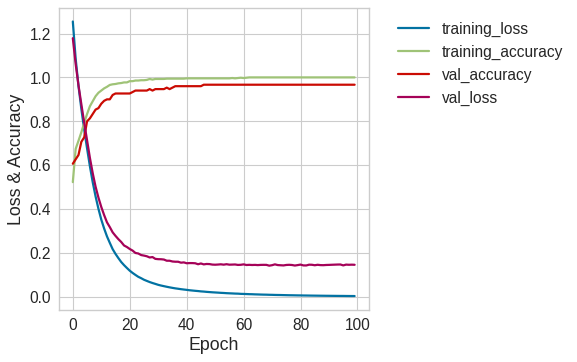

In [52]:
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
BATCH_SIZE = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (train_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = (val_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu',input_shape=(2,450)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4,activation='softmax')
])


dense_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
dense_model.summary()              

history=dense_model.fit(train_dataset,validation_data=val_dataset, epochs=100,verbose=1)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5),dpi=80)
ax = fig.add_subplot(111)
ax.plot(history.history['loss'], linewidth=2)
ax.plot(history.history['accuracy'],linewidth=2)
ax.plot(history.history['val_accuracy'],linewidth=2)
ax.plot(history.history['val_loss'],linewidth=2)
ax.grid(True)
ax.set_ylabel('Loss & Accuracy', fontsize=16)
ax.set_xlabel('Epoch',fontsize=16)
ax.legend(['training_loss', 'training_accuracy', 'val_accuracy', 'val_loss'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# accuracy!
print("Training results")
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Training Loss: {history.history['loss'][-1]}")

# evaluating dense_model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")

plt.show()

## =============================

## Tensorflow Decision Forests Trial

In [23]:
import tensorflow_decision_forests as tfdf

SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
BATCH_SIZE = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (train_dataset.batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = (val_dataset.batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = (val_dataset.batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

model = tfdf.keras.RandomForestModel(verbose=1,check_dataset=False)
history=model.fit(train_dataset,verbose=1)

# Summary of the model structure.
model.summary()

# Evaluate the model.
model.evaluate(x_test,y_test,verbose=1)

Use /tmp/tmpybmozvjo as temporary training directory
Reading training dataset...
Training dataset read in 0:00:03.623111. Found 2100 examples.
Training model...
Model trained in 0:00:00.395801
Compiling model...


[INFO 2023-01-13T10:49:39.216426881+01:00 kernel.cc:1175] Loading model from path /tmp/tmpybmozvjo/model/ with prefix 72b46c7577d342d2
[INFO 2023-01-13T10:49:39.262172234+01:00 abstract_model.cc:1306] Engine "RandomForestGeneric" built
[INFO 2023-01-13T10:49:39.262309568+01:00 kernel.cc:1021] Use fast generic engine


Model compiled.
Model: "random_forest_model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (900):
	data:0.0
	data:0.1
	data:0.10
	data:0.100
	data:0.101
	data:0.102
	data:0.103
	data:0.104
	data:0.105
	data:0.106
	data:0.107
	data:0.108
	data:0.109
	data:0.11
	data:0.110
	data:0.111
	data:0.112
	data:0.113
	data:0.114
	data:0.115
	data:0.116
	data:0.117
	data:0.118
	data:0.119
	data:0.12
	data:0.120
	data:0.121
	data:0.122
	data:0.123
	data:0.124
	data:0.125
	data:0.126
	data:0.127
	data:0.128
	data:0.129
	data:0.13
	data:0.130
	data:0.131
	data:0.132
	data:0.133
	data:0.134
	data:0.135
	data:0.136
	data:0.137
	data:0.138
	data:0.139
	data:0.14
	data:0.140
	data:0.141
	data:0.142
	data:0.143
	data:0.

0.0

In [26]:
model.evaluate(x_test,y_test,verbose=1)
output = model.predict(x_test)
test_output = output.argmax(axis=1)

15/15 [==============================] - 1s 5ms/step


### Convert model to TFLite Format 
    Note that error occurs during TFLite conversion


In [28]:
model.save("random_forest_model")

INFO:tensorflow:Assets written to: random_forest_model/assets


INFO:tensorflow:Assets written to: random_forest_model/assets


In [27]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
random_forest_model = converter.convert()
tflite_model_file = pathlib.Path('random_forest_model.tflite')
tflite_model_file.write_bytes(random_forest_model)

INFO:tensorflow:Assets written to: /tmp/tmphvmy5f50/assets


INFO:tensorflow:Assets written to: /tmp/tmphvmy5f50/assets
[INFO 2023-01-13T10:57:39.150530954+01:00 kernel.cc:1175] Loading model from path /tmp/tmphvmy5f50/assets/ with prefix 72b46c7577d342d2
[INFO 2023-01-13T10:57:39.194489639+01:00 decision_forest.cc:640] Model loaded with 300 root(s), 18552 node(s), and 900 input feature(s).
[INFO 2023-01-13T10:57:39.194521499+01:00 abstract_model.cc:1306] Engine "RandomForestGeneric" built
[INFO 2023-01-13T10:57:39.19464756+01:00 kernel.cc:1021] Use fast generic engine
2023-01-13 10:57:39.389727: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2023-01-13 10:57:39.529794: I tensorflow/cc/saved_model/loader.cc:213] Running initialization op on SavedModel bundle at path: /tmp/tmphvmy5f50
[INFO 2023-01-13T10:57:39.660162647+01:00 kernel.cc:1175] Loading model from path /tmp/tmphvmy5f50/assets/ with prefix 72b46c7577d342d2
[INFO 2023-01-13T10:57:39.702863622+01:00 decision_forest.cc:640] Model loaded with 300 root(s), 18552 no

ConverterError: <unknown>:0: error: loc(fused["SimpleMLCreateModelResource:", "SimpleMLCreateModelResource"]): 'tf.SimpleMLCreateModelResource' op is neither a custom op nor a flex op
<unknown>:0: note: loc(fused["SimpleMLCreateModelResource:", "SimpleMLCreateModelResource"]): Error code: ERROR_NEEDS_CUSTOM_OPS
/home/veysiadn/anaconda3/lib/python3.9/site-packages/tensorflow/python/framework/func_graph.py:749:0: error: 'tf.SimpleMLInferenceOpWithHandle' op is neither a custom op nor a flex op
<unknown>:0: note: loc(fused["StatefulPartitionedCall:", "StatefulPartitionedCall"]): called from
/home/veysiadn/anaconda3/lib/python3.9/site-packages/tensorflow/python/framework/func_graph.py:749:0: note: Error code: ERROR_NEEDS_CUSTOM_OPS
<unknown>:0: error: failed while converting: 'main': 
Some ops in the model are custom ops, See instructions to implement custom ops: https://www.tensorflow.org/lite/guide/ops_custom 
Custom ops: SimpleMLCreateModelResource, SimpleMLInferenceOpWithHandle
Details:
	tf.SimpleMLCreateModelResource() -> (tensor<!tf_type.resource>) : {container = "", device = "", shared_name = "simple_ml_model_184e8ea3-faf0-434d-b319-d2af1308a543"}
	tf.SimpleMLInferenceOpWithHandle(tensor<?x900xf32>, tensor<0x0xf32>, tensor<0x0xi32>, tensor<0xi32>, tensor<1xi64>, tensor<1xi64>, tensor<!tf_type.resource>) -> (tensor<?x4xf32>, tensor<4x!tf_type.string>) : {dense_output_dim = 4 : i64, device = ""}



## Let's try SKLEARN Random Forest and Emlearn library for deployment

In [28]:
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(n_estimators=5, max_depth=10, random_state=0)
estimator.fit(x_train, y_train)
estimator.score(x_test, y_test)

ValueError: Found array with dim 3. RandomForestClassifier expected <= 2.

### Convert it to header file using emlearn library

In [5]:
import emlearn
cmodel = emlearn.convert(estimator, method='inline')
cmodel.save(file='my-test.h')

In file included from tmp/myinlinetree.c:2:
tmp/myinlinetree.h:8:5: warning: overflow in conversion from ‘int’ to ‘signed char’ changes value from ‘484’ to ‘-28’ [-Woverflow]
    8 |   { 484, -0.007702185306698084, 1, 11 },
      |     ^~~
tmp/myinlinetree.h:10:5: warning: overflow in conversion from ‘int’ to ‘signed char’ changes value from ‘675’ to ‘-93’ [-Woverflow]
   10 |   { 675, 0.24414151161909103, 3, 4 },
      |     ^~~
tmp/myinlinetree.h:18:5: warning: overflow in conversion from ‘int’ to ‘signed char’ changes value from ‘678’ to ‘-90’ [-Woverflow]
   18 |   { 678, 0.0975034087896347, 3, 4 },
      |     ^~~
tmp/myinlinetree.h:19:5: warning: overflow in conversion from ‘int’ to ‘signed char’ changes value from ‘481’ to ‘-31’ [-Woverflow]
   19 |   { 481, 0.0414523184299469, 12, 41 },
      |     ^~~
tmp/myinlinetree.h:20:5: warning: overflow in conversion from ‘int’ to ‘signed char’ changes value from ‘399’ to ‘-113’ [-Woverflow]
   20 |   { 399, 0.10727360472083092, 13, 35 

'\n    // !!! This file is generated using emlearn !!!\n\n    #include <eml_trees.h>\n    \n\nEmlTreesNode my-test_nodes[208] = {\n  { 484, -0.007702185306698084, 1, 11 },\n  { 9, -0.07476218044757843, 2, 5 },\n  { 675, 0.24414151161909103, 3, 4 },\n  { -1, 3, -1, -1 },\n  { -1, 2, -1, -1 },\n  { 14, 0.08195648714900017, 6, 10 },\n  { 101, 0.17255660519003868, 7, 3 },\n  { 95, -0.15228596329689026, 3, 8 },\n  { 153, 0.08024338260293007, 4, 9 },\n  { -1, 0, -1, -1 },\n  { 678, 0.0975034087896347, 3, 4 },\n  { 481, 0.0414523184299469, 12, 41 },\n  { 399, 0.10727360472083092, 13, 35 },\n  { 305, 0.11034835875034332, 14, 27 },\n  { 198, 0.13261503726243973, 15, 25 },\n  { 892, -0.017380392644554377, 16, 17 },\n  { 166, 0.2606637515127659, 4, 3 },\n  { 705, -0.013058623066172004, 18, 19 },\n  { 396, -0.057050833478569984, 3, 4 },\n  { 405, -0.0006814994267188013, 20, 23 },\n  { 355, 0.20455097407102585, 21, 3 },\n  { 628, -0.04278549598529935, 4, 22 },\n  { -1, 1, -1, -1 },\n  { 436, 0.1532

In [65]:
import emlearn
print(emlearn.includedir)

/home/veysiadn/anaconda3/lib/python3.9/site-packages/emlearn


In [27]:
print(x_test[0])

[-0.44618714  0.25559005  0.21806262  0.25512227  0.27173457  0.36790705
  0.38412112  0.36333388  0.34644294  0.39875942  0.38573113  0.30471265
  0.38895804  0.3836807   0.41528833  0.41419184  0.39854285  0.37805247
  0.39843586  0.3300911   0.3809844   0.52401674  0.2873018   0.37501842
  0.37403062  0.4374031   0.3468364   0.3632935   0.34201065  0.34281415
  0.3530596   0.30610153  0.34375894  0.2647036   0.25198984  0.23978303
  0.24795893  0.24289636  0.20484747  0.20528577  0.16801237  0.15115447
  0.1480764  -0.45726267 -0.4505978  -0.4195635  -0.42000914 -0.4321866
 -0.42587844 -0.42563453 -0.39316267 -0.36739713 -0.3706564  -0.3406611
 -0.31479368 -0.300859   -0.2835152  -0.23496187 -0.25088957 -0.24789216
 -0.21507493 -0.19390798 -0.17050387 -0.16315326 -0.13724065 -0.11096714
 -0.08437268 -0.05473755 -0.03812559 -0.04851856 -0.00501184 -0.00996306
  0.01857807  0.05119725  0.10712849  0.13399357  0.17621037  0.20213625
  0.21274742  0.22788306  0.23291452  0.25281894  0.2

In [7]:
print(y_test[0])

3.0


In [9]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=5,random_state=0)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

1.0

In [11]:
cmodel=0

In [15]:
import emlearn
cmodel = emlearn.convert(clf, method='inline')
cmodel.save(file='extra_tree_clf_postural_sway.h')

KeyboardInterrupt: 

## Let's try to decrease prediction window from 4.5 seconds to 1 second

In [74]:
import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# root_dir = 'C:/Users/101/repos/postural_sway_analysis/data/'

classes = ['Stab_standing','Stab_AP','Stab_ML','Stab_Instabile']

min_len = 100
input_data = np.zeros((1,min_len*2))
output_data = []
min_file_name = ''
for filename in glob.iglob('./data/Case_*/**/*.txt', recursive=True):
    # print(filename)
    temp_data = np.loadtxt(filename)
    for i in range(int(temp_data.shape[0]/100)):
        concat_data = temp_data[min_len*i:min_len*(i+1)]
        temp2_data = temp_data[min_len*(i+1):min_len*(i+2)]
        concat_data = np.concatenate((concat_data[:,0],concat_data[:,1]), axis=0)
        if classes[0] in filename:
            stab_standing = temp2_data
            output_data = np.append(output_data, 0)
        if classes[1] in filename:
            stab_ap = temp2_data
            output_data = np.append(output_data, 1)
        if classes[2] in filename:
            stab_ml = temp2_data
            output_data = np.append(output_data, 2)
        if classes[3] in filename:
            stab_instabile = temp2_data
            output_data = np.append(output_data, 3)
        concat_data = np.reshape(concat_data, (1,concat_data.shape[0]))    
        input_data = np.append(input_data, concat_data,axis=0)
        input_data = np.float32(input_data)
input_data = np.delete(input_data, 0, axis=0)
print(f"Input data shape  : {input_data.shape}")
print(f"Output data shape : {output_data.shape}")

Input data shape  : (4832, 200)
Output data shape : (4832,)


### Train, test and validation split

In [72]:
x_data = input_data
y_data = output_data
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
# split into train test sets
x_train, x_val_to_use, y_train, y_val_to_use = train_test_split(x_data, y_data, test_size=0.3,random_state=SEED)
x_val, x_test, y_val, y_test = train_test_split(x_val_to_use, y_val_to_use, test_size=0.5,random_state=SEED)

print(f" {len(x_train), len(x_val), len(x_test)}")
print(f" {len(y_train), len(y_val), len(y_test)}")

 (3382, 725, 725)
 (3382, 725, 725)


### Try a dense model for 1x200 input size : DAP and DML concatenated

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 12)                2412      
                                                                 
 dense_69 (Dense)            (None, 4)                 52        
                                                                 
 dense_70 (Dense)            (None, 4)                 20        
                                                                 
Total params: 2,484
Trainable params: 2,484
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
106/106 [==============================] - 1s 2ms/step - loss: 1.1937 - accuracy: 0.4805 - val_loss: 1.0320 - val_accuracy: 0.5959
Epoch 2/100
106/106 [==============================] - 0s 1ms/step - loss: 0.9309 - accuracy: 0.6236 - val_loss: 0.7896 - val_accuracy: 0.6910
Epoch 3/100
106/106 [========

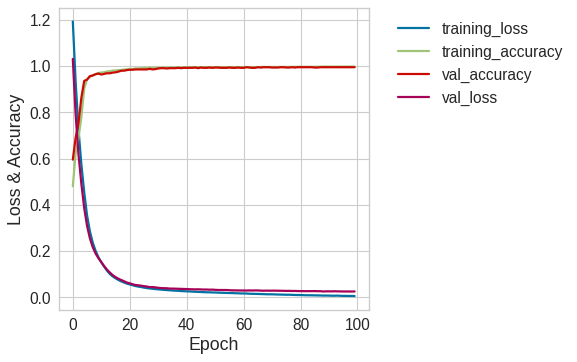

In [57]:
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
BATCH_SIZE = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (train_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = (val_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu',input_shape=(200,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4,activation='softmax')
])


dense_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
dense_model.summary()              

history=dense_model.fit(train_dataset,validation_data=val_dataset, epochs=100,verbose=1)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5),dpi=80)
ax = fig.add_subplot(111)
ax.plot(history.history['loss'], linewidth=2)
ax.plot(history.history['accuracy'],linewidth=2)
ax.plot(history.history['val_accuracy'],linewidth=2)
ax.plot(history.history['val_loss'],linewidth=2)
ax.grid(True)
ax.set_ylabel('Loss & Accuracy', fontsize=16)
ax.set_xlabel('Epoch',fontsize=16)
ax.legend(['training_loss', 'training_accuracy', 'val_accuracy', 'val_loss'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# accuracy!
print("Training results")
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Training Loss: {history.history['loss'][-1]}")

# evaluating dense_model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")

plt.show()

In [58]:
dense_model.evaluate(x_test, y_test)

23/23 [==============================] - 0s 768us/step - loss: 0.0671 - accuracy: 0.9862


[0.06714431941509247, 0.9862068891525269]

### Try a Random Forest model for 100 samples

In [59]:
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(n_estimators=10, max_depth=20)
estimator.fit(x_train, y_train)
estimator.score(x_test, y_test)

0.9875862068965517

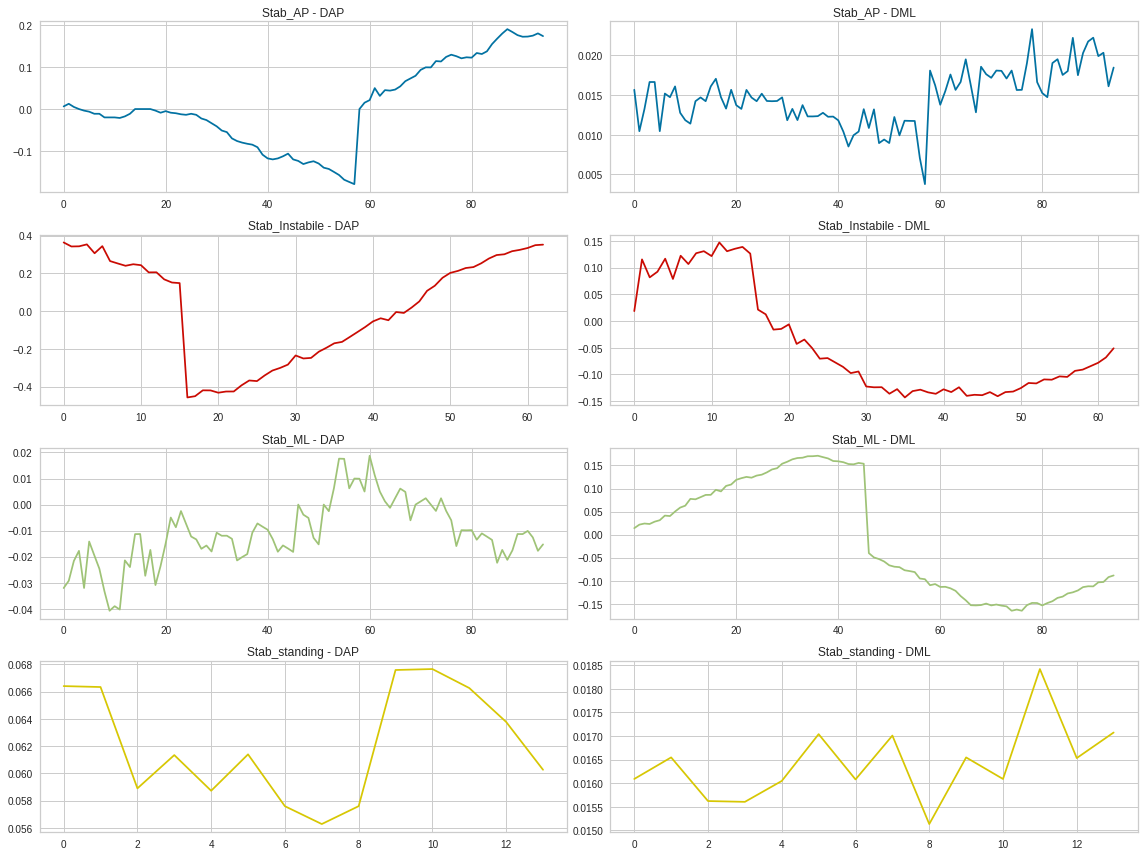

In [75]:
# Plot 2x2 subplots
# %matplotlib
# %matplotlib
fig, axs = plt.subplots(4, 2, figsize=(16,12))
axs[0, 0].plot(stab_ap[:,0])
axs[0, 0].set_title('Stab_AP - DAP')

axs[0,1].plot(stab_ap[:,1])
axs[0,1].set_title('Stab_AP - DML')

axs[1, 0].plot(stab_instabile[:,0], c='r')
axs[1, 0].set_title('Stab_Instabile - DAP')

axs[1,1].plot(stab_instabile[:,1], c='r')
axs[1,1].set_title('Stab_Instabile - DML')

axs[2, 0].plot(stab_ml[:,0], c='g')
axs[2, 0].set_title('Stab_ML - DAP')

axs[2,1].plot(stab_ml[:,1], c='g')
axs[2,1].set_title('Stab_ML - DML')

axs[3, 0].plot(stab_standing[:,0], c='y')
axs[3, 0].set_title('Stab_standing - DAP')

axs[3,1].plot(stab_standing[:,1], c='y')
axs[3,1].set_title('Stab_standing - DML')
plt.tight_layout()

## Let's try 2x100 as input 

In [76]:
import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# root_dir = 'C:/Users/101/repos/postural_sway_analysis/data/'

classes = ['Stab_standing','Stab_AP','Stab_ML','Stab_Instabile']

min_len = 100
input_data = np.zeros((1,2,min_len))
output_data = []
min_file_name = ''
for filename in glob.iglob('./data/Case_*/**/*.txt', recursive=True):
    # print(filename)
    temp_data = np.loadtxt(filename)
    for i in range(int(temp_data.shape[0]/100)):
        concat_data = temp_data[min_len*i:min_len*(i+1)]
        if classes[0] in filename:
            stab_standing = temp_data
            output_data = np.append(output_data, 0)
        if classes[1] in filename:
            stab_ap = temp_data
            output_data = np.append(output_data, 1)
        if classes[2] in filename:
            stab_ml = temp_data
            output_data = np.append(output_data, 2)
        if classes[3] in filename:
            stab_instabile = temp_data
            output_data = np.append(output_data, 3)
        concat_data = np.transpose(concat_data)
        concat_data = np.expand_dims(concat_data, axis=0)
        input_data = np.append(input_data, concat_data,axis=0)
        input_data = np.float32(input_data)
input_data = np.delete(input_data, 0, axis=0)
print(f"Input data shape : {input_data.shape}")
print(f"Output data shape : {output_data.shape}")

Input data shape : (4832, 2, 100)
Output data shape : (4832,)


### Train, test and validation split

In [62]:
x_data = input_data
y_data = output_data
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
# split into train test sets
x_train, x_val_to_use, y_train, y_val_to_use = train_test_split(x_data, y_data, test_size=0.3,random_state=SEED)
x_val, x_test, y_val, y_test = train_test_split(x_val_to_use, y_val_to_use, test_size=0.5,random_state=SEED)

print(f" {len(x_train), len(x_val), len(x_test)}")
print(f" {len(y_train), len(y_val), len(y_test)}")

 (3382, 725, 725)
 (3382, 725, 725)


### Dense Model with 2x100 vector DAP & DML  inputs

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 2, 12)             1212      
                                                                 
 dense_72 (Dense)            (None, 2, 4)              52        
                                                                 
 flatten_3 (Flatten)         (None, 8)                 0         
                                                                 
 dense_73 (Dense)            (None, 4)                 36        
                                                                 
Total params: 1,300
Trainable params: 1,300
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
106/106 [==============================] - 1s 2ms/step - loss: 1.2535 - accuracy: 0.5444 - val_loss: 1.1504 - val_accuracy: 0.6455
Epoch 2/100
106/106 [===================

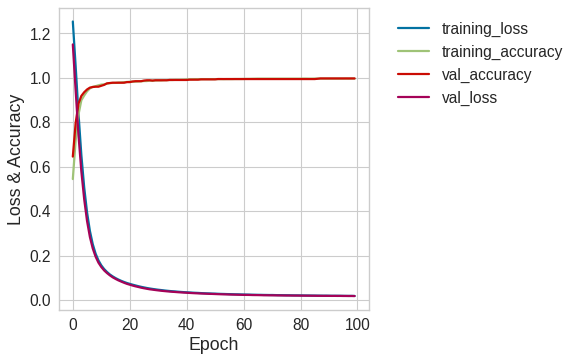

In [63]:
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
BATCH_SIZE = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (train_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = (val_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu',input_shape=(2,100)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4,activation='softmax')
])


dense_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
dense_model.summary()              

history=dense_model.fit(train_dataset,validation_data=val_dataset, epochs=100,verbose=1)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5),dpi=80)
ax = fig.add_subplot(111)
ax.plot(history.history['loss'], linewidth=2)
ax.plot(history.history['accuracy'],linewidth=2)
ax.plot(history.history['val_accuracy'],linewidth=2)
ax.plot(history.history['val_loss'],linewidth=2)
ax.grid(True)
ax.set_ylabel('Loss & Accuracy', fontsize=16)
ax.set_xlabel('Epoch',fontsize=16)
ax.legend(['training_loss', 'training_accuracy', 'val_accuracy', 'val_loss'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# accuracy!
print("Training results")
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Training Loss: {history.history['loss'][-1]}")

# evaluating dense_model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")

plt.show()